# Movie Review Sentiment

In [183]:
# I am going to explore 2 methods of applying sentiment Analysis

## Method 1 ===> Custom Model
# Load and clean the text using NLTK
# Create A Bag of Words vector/matrix) Feature (feature 1)
# Create a TDIDF Vector fetures (feature 2)
# Create 2 Naive Bayes Models based Bow and TF-IDF

## Method 2 (pretrained model) model = VADER
#Leverage Vader for sentiment analysis

## Evaluate all models using test.csv


In [182]:
####Step 1 : Import all Libraries

import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

!pip install nltk

import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("stopwords")

nltk.download('punkt_tab')

# for TQDM

!pip install tqdm

from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report

# For Vader
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ReDI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ReDI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ReDI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [106]:
# Load up train.cv as train
train = pd.read_csv("train.csv")

In [107]:
train.head()

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [108]:
train['sentiment']

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
24995    pos
24996    pos
24997    neg
24998    neg
24999    neg
Name: sentiment, Length: 25000, dtype: object

In [109]:
## total number of rows
len(train)

25000

<Axes: xlabel='count', ylabel='sentiment'>

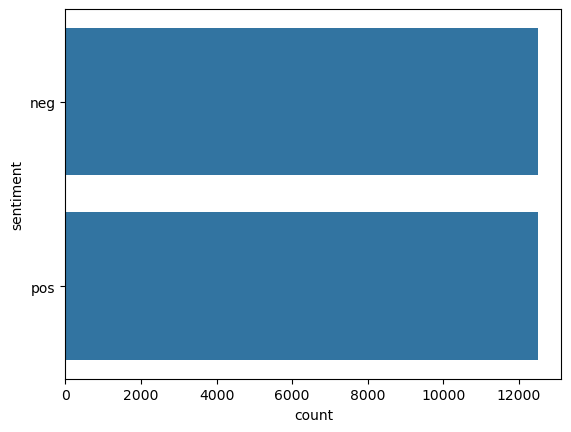

In [110]:
## plotting the number of pos and neg values in my dataset

sns.countplot(train['sentiment'])


In [111]:
example = train['text'].iloc[12]

In [112]:
example

"My kids picked this out at the video store...it's great to hear Liza as Dorothy cause she sounds just like her mom. But there are too many bad songs, and the animation is pretty crude compared to other cartoons of that time."

In [113]:
train['sentiment'].iloc[12]

'neg'

In [114]:
example.split()

['My',
 'kids',
 'picked',
 'this',
 'out',
 'at',
 'the',
 'video',
 "store...it's",
 'great',
 'to',
 'hear',
 'Liza',
 'as',
 'Dorothy',
 'cause',
 'she',
 'sounds',
 'just',
 'like',
 'her',
 'mom.',
 'But',
 'there',
 'are',
 'too',
 'many',
 'bad',
 'songs,',
 'and',
 'the',
 'animation',
 'is',
 'pretty',
 'crude',
 'compared',
 'to',
 'other',
 'cartoons',
 'of',
 'that',
 'time.']

In [115]:
len(example.split())

42

In [116]:
train['text'].iloc[7]

"I'm a sucker for a good romance, but this one doesn't qualify as either good or a romance. I had the plot nailed down before the credits were through. With such poor dialog, plot and character development, I suggest investing your hour and a half elsehere. I had to rush out and rent Serendipity for the third time so I could get the bad taste of this one out of my mouth."

In [117]:
stop_words = set(stopwords.words("english"))

In [118]:
stop_words 

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [119]:
example

"My kids picked this out at the video store...it's great to hear Liza as Dorothy cause she sounds just like her mom. But there are too many bad songs, and the animation is pretty crude compared to other cartoons of that time."

In [120]:
word_tokenize(example)

['My',
 'kids',
 'picked',
 'this',
 'out',
 'at',
 'the',
 'video',
 'store',
 '...',
 'it',
 "'s",
 'great',
 'to',
 'hear',
 'Liza',
 'as',
 'Dorothy',
 'cause',
 'she',
 'sounds',
 'just',
 'like',
 'her',
 'mom',
 '.',
 'But',
 'there',
 'are',
 'too',
 'many',
 'bad',
 'songs',
 ',',
 'and',
 'the',
 'animation',
 'is',
 'pretty',
 'crude',
 'compared',
 'to',
 'other',
 'cartoons',
 'of',
 'that',
 'time',
 '.']

In [121]:
word_tokens = word_tokenize(example)

In [122]:
[word for word in word_tokens if word.lower() not in stop_words]

['kids',
 'picked',
 'video',
 'store',
 '...',
 "'s",
 'great',
 'hear',
 'Liza',
 'Dorothy',
 'cause',
 'sounds',
 'like',
 'mom',
 '.',
 'many',
 'bad',
 'songs',
 ',',
 'animation',
 'pretty',
 'crude',
 'compared',
 'cartoons',
 'time',
 '.']

In [123]:
##Creating a function  that will filter out stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(example)
filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

In [124]:
filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

In [125]:
filtered_text

['kids',
 'picked',
 'video',
 'store',
 '...',
 "'s",
 'great',
 'hear',
 'Liza',
 'Dorothy',
 'cause',
 'sounds',
 'like',
 'mom',
 '.',
 'many',
 'bad',
 'songs',
 ',',
 'animation',
 'pretty',
 'crude',
 'compared',
 'cartoons',
 'time',
 '.']

In [126]:
# removing stopwords
word_tokens

['My',
 'kids',
 'picked',
 'this',
 'out',
 'at',
 'the',
 'video',
 'store',
 '...',
 'it',
 "'s",
 'great',
 'to',
 'hear',
 'Liza',
 'as',
 'Dorothy',
 'cause',
 'she',
 'sounds',
 'just',
 'like',
 'her',
 'mom',
 '.',
 'But',
 'there',
 'are',
 'too',
 'many',
 'bad',
 'songs',
 ',',
 'and',
 'the',
 'animation',
 'is',
 'pretty',
 'crude',
 'compared',
 'to',
 'other',
 'cartoons',
 'of',
 'that',
 'time',
 '.']

In [127]:
' '.join(filtered_text)

"kids picked video store ... 's great hear Liza Dorothy cause sounds like mom . many bad songs , animation pretty crude compared cartoons time ."

In [128]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [129]:
remove_stopwords(train['text'].iloc[23])

"Although seen mini-series twenty years still remember balance character , plot tale marvelous adventures succeeded . use special effects restrained making poetic rather literal telling story . two versions 've seen dubbed ( English French ) actors appear speak language Italian synchronization problem . spoil story telling . Among cast Irene Pappas Penelope recognizable North Americans . Recommended followers Odysseus ' ever returning ."

In [130]:
#using tqdm

tqdm.pandas()

In [131]:
train['cleaned_text'] = train['text'].progress_apply(remove_stopwords)

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:12<00:00, 346.41it/s]


In [132]:
train['cleaned_text']

0        , wo n't deny purchased eBay , high expectatio...
1        saddest thing `` tribute '' almost singers ( i...
2        Last night decided watch prequel shall say cal...
3        admit liked first half Sleepers . looked good ...
4        impressed film especially fact went cinema fam...
                               ...                        
24995    film fun , person likes good campy feature fil...
24996    seeing film feel like know little bit USA . Da...
24997    first deserves 5 stars due acting ( would give...
24998    like films ramble little plot exposition spice...
24999    interesting sheet cardboard , dispensable peri...
Name: cleaned_text, Length: 25000, dtype: object

In [133]:
train['cleaned_text'].iloc[0]

", wo n't deny purchased eBay , high expectations . incredible out-of-print work master comedy enjoy . However , soon disappointed . Apologies enjoyed , found Compleat Al difficult watch . got smiles , sure , majority funny came music videos ( 've got DVD ) rest basically filler . could tell Al 's greatest video achievement ( honor goes UHF ) . Honestly , doubt ever make jump DVD , 're ultra-hardcore Al fan everything , buy tape eBay . n't pay much ."

In [134]:
##creating bag of words and tf-idf

# bow means bag of words

vectorizer_bow = CountVectorizer()

In [135]:
bow_matrix = vectorizer_bow.fit_transform(train['cleaned_text'])

In [136]:
bow_matrix

<25000x74833 sparse matrix of type '<class 'numpy.int64'>'
	with 2512790 stored elements in Compressed Sparse Row format>

In [137]:
vectorizer_tfidf = TfidfVectorizer()

In [138]:
tfidf_matrix = vectorizer_tfidf.fit_transform(train['cleaned_text'])

In [139]:
tfidf_matrix

<25000x74833 sparse matrix of type '<class 'numpy.float64'>'
	with 2512790 stored elements in Compressed Sparse Row format>

In [140]:
######## Naive Baiyes using Bag of Words

X_train_bow, X_test_bow, y_train, y_test = train_test_split(bow_matrix, train['sentiment'], test_size = 0.1, random_state = 42)

###### for tfidf

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(bow_matrix, train['sentiment'], test_size = 0.1, random_state = 42)

In [141]:
###training model on bag of words 2 models

nb_bow = MultinomialNB()

nb_bow.fit(X_train_bow, y_train)

MultinomialNB()

In [142]:
###training model on tfidf
nb_tfidf = MultinomialNB()

nb_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [143]:
y_pred_bow = nb_bow.predict(X_test_bow)

In [144]:
y_pred_bow

array(['neg', 'pos', 'pos', ..., 'pos', 'neg', 'neg'], dtype='<U3')

In [145]:
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

In [146]:
y_pred_tfidf

array(['neg', 'pos', 'pos', ..., 'pos', 'neg', 'neg'], dtype='<U3')

In [147]:
accuracy_bow = accuracy_score(y_test, y_pred_bow)

In [148]:
print('accuracy BOW')
print(accuracy_bow)


accuracy BOW
0.8644


In [149]:
print(classification_report(y_test, y_pred_bow))

              precision    recall  f1-score   support

         neg       0.85      0.89      0.87      1266
         pos       0.88      0.84      0.86      1234

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.86      0.86      2500



In [150]:
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print('accuracy TF-IDF')
print(accuracy_tfidf)

accuracy TF-IDF
0.8644


In [151]:
print(classification_report(y_test, y_pred_tfidf))

              precision    recall  f1-score   support

         neg       0.85      0.89      0.87      1266
         pos       0.88      0.84      0.86      1234

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.86      0.86      2500



In [152]:
## For Second Method - Vader
text = 'vader is a bad tool for sentiment analysis'

analyzer = SentimentIntensityAnalyzer()

In [153]:
analyzer.polarity_scores(text)

{'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.5423}

In [154]:
def generate_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] > 0:
        return "pos"
    else:
        return "neg" 

In [155]:
train['predictions'] = train['text'].progress_apply(generate_sentiment)

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:35<00:00, 260.96it/s]


In [156]:
## score my model

accuracy_vader = accuracy_score(train['sentiment'], train['predictions'])

print('accuracy Vader')
print(accuracy_vader)

print(classification_report(train['sentiment'], train['predictions']))

accuracy Vader
0.69428
              precision    recall  f1-score   support

         neg       0.78      0.54      0.64     12500
         pos       0.65      0.85      0.74     12500

    accuracy                           0.69     25000
   macro avg       0.72      0.69      0.69     25000
weighted avg       0.72      0.69      0.69     25000



In [157]:
##Vader ++> trains on social medis tweets
##look out for other general purpose alternative to vader

In [158]:
## Load in Test File and See how to process it using all 3 models

In [160]:
# Load in the CSV file
# clean the text
# create tfidf and bow
#apply the models to both features

#### for Vader
#load in csv
#apply the function


In [161]:
# load dataset
test = pd.read_csv("test.csv")

In [162]:
test

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos
...,...,...
24995,"For one thing, he produced this movie. It has ...",neg
24996,The title comes from an alteration an adolesce...,pos
24997,Christopher Nolan's first film is a 'no budget...,pos
24998,The story is shortly about the faith-lacking b...,neg


In [164]:
test['vader'] = test['text'].progress_apply(generate_sentiment)

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:34<00:00, 265.12it/s]


### For the other models

In [167]:
# clean the data

test['cleaned'] = test['text'].progress_apply(remove_stopwords)

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:02<00:00, 401.88it/s]


In [176]:
### Create bag of words
bow_test = vectorizer_bow.transform(test['cleaned'])
            

###Create TFIDF
tfidf_test = vectorizer_tfidf.transform(test['cleaned'])

In [177]:
test['bow'] = nb_bow.predict(bow_test)

test['tfidf'] = nb_tfidf.predict(tfidf_test)

In [178]:
test

,text,sentiment,vader,cleaned,bow,tfidf
0,"My daughter liked it but I was aghast, that a ...",neg,pos,"daughter liked aghast , character movie smokes...",neg,neg
1,I... No words. No words can describe this. I w...,neg,neg,... words . words describe . try sake brave pe...,neg,neg
2,this film is basically a poor take on the old ...,neg,neg,film basically poor take old urban legend baby...,neg,neg
3,"This is a terrible movie, and I'm not even sur...",neg,pos,"terrible movie , 'm even sure 's terrible . 's...",neg,neg
4,First of all this movie is a piece of reality ...,pos,pos,First movie piece reality well realized artist...,pos,pos
...,...,...,...,...,...,...
24995,"For one thing, he produced this movie. It has ...",neg,pos,"one thing , produced movie . feel later movies...",pos,pos
24996,The title comes from an alteration an adolesce...,pos,pos,title comes alteration adolescent inmate corre...,pos,pos
24997,Christopher Nolan's first film is a 'no budget...,pos,neg,Christopher Nolan 's first film 'no budget ' b...,pos,pos
24998,The story is shortly about the faith-lacking b...,neg,neg,story shortly faith-lacking business man pries...,neg,neg


In [179]:
accuracy_vader = accuracy_score(test['sentiment'], test['vader'])

print('accuracy Vader')
print(accuracy_vader)

print(classification_report(test['sentiment'], test['vader']))

accuracy Vader
0.69832
              precision    recall  f1-score   support

         neg       0.79      0.54      0.64     12500
         pos       0.65      0.86      0.74     12500

    accuracy                           0.70     25000
   macro avg       0.72      0.70      0.69     25000
weighted avg       0.72      0.70      0.69     25000



In [180]:
accuracy_bow = accuracy_score(test['sentiment'], test['bow'])

print('accuracy Bag of Words')
print(accuracy_bow)

print(classification_report(test['sentiment'], test['bow']))

accuracy Bag of Words
0.82412
              precision    recall  f1-score   support

         neg       0.79      0.88      0.83     12500
         pos       0.87      0.77      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.83      0.82      0.82     25000
weighted avg       0.83      0.82      0.82     25000



In [181]:
accuracy_tfidf = accuracy_score(test['sentiment'], test['tfidf'])

print('accuracy TF-IDF')
print(accuracy_tfidf)

print(classification_report(test['sentiment'], test['tfidf']))

accuracy TF-IDF
0.81056
              precision    recall  f1-score   support

         neg       0.80      0.84      0.82     12500
         pos       0.83      0.79      0.81     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



#### Bag of words is the best model for this project since it has an accuracy of 82%